In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler

In [3]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

Saving Kuantan1975-2017New.csv to Kuantan1975-2017New.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Kuantan1975-2017New.csv']))
print(df,sep=',')
df.head()

                  Date  Year  Month  Day  KUANTAN[mm]
0        1/1/1975 0:00  1975      1    1          0.5
1        1/2/1975 0:00  1975      1    2        131.3
2        1/3/1975 0:00  1975      1    3         10.8
3        1/4/1975 0:00  1975      1    4        240.5
4        1/5/1975 0:00  1975      1    5         18.1
...                ...   ...    ...  ...          ...
15690  12/27/2017 0:00  2017     12   27          2.6
15691  12/28/2017 0:00  2017     12   28         20.6
15692  12/29/2017 0:00  2017     12   29         49.4
15693  12/30/2017 0:00  2017     12   30         14.4
15694  12/31/2017 0:00  2017     12   31         61.4

[15695 rows x 5 columns]


,Date,Year,Month,Day,KUANTAN[mm]
0,1/1/1975 0:00,1975,1,1,0.5
1,1/2/1975 0:00,1975,1,2,131.3
2,1/3/1975 0:00,1975,1,3,10.8
3,1/4/1975 0:00,1975,1,4,240.5
4,1/5/1975 0:00,1975,1,5,18.1


In [5]:
rain = df.loc[:, 'KUANTAN[mm]']
rain.head()

0      0.5
1    131.3
2     10.8
3    240.5
4     18.1
Name: KUANTAN[mm], dtype: float64

In [0]:
rain.head()

0      0.5
1    131.3
2     10.8
3    240.5
4     18.1
Name: KUANTAN[mm], dtype: float64

In [6]:
#split into samples
from numpy import array

#15695/365 = 43
#sample = list(rain)
#length = 365
#n = 15695
 
#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  x, y = list(), list()
  for i in range(len(sequence)):
    #find end of this pattern
    end_ix = i + n_steps
    #check if beyond the sequence
    if end_ix > len(sequence)-1:
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x), array(y)

series = array(rain)
print(series.shape)

x, y = split_sequence(series, 365)
print(x.shape, y.shape)

(15695,)
(15330, 365) (15330,)


In [7]:
print(x)

[[  0.5 131.3  10.8 ...   8.9   5.9   0.6]
 [131.3  10.8 240.5 ...   5.9   0.6   0. ]
 [ 10.8 240.5  18.1 ...   0.6   0.    0. ]
 ...
 [  0.    1.8  40.2 ...   9.6   2.6  20.6]
 [  1.8  40.2  21.6 ...   2.6  20.6  49.4]
 [ 40.2  21.6   6.  ...  20.6  49.4  14.4]]


In [8]:
print(y)

[ 0.   0.   1.8 ... 49.4 14.4 61.4]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10731, 365) (10731,)
(4599, 365) (4599,)


In [11]:
#reshape 
series1 = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
series2 = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(series1.shape)
print(series2.shape)

(10731, 365, 1)
(4599, 365, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [24]:
k.clear_session()
model = Sequential()

model.add(LSTM(10, input_shape=(365, 1)))

model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

**batch size for series1 = 3, 7, 21, 49, 73, 147, 219, 511, 1533, 3577**


In [27]:
model.fit(series1, y_train, epochs=100,
          batch_size=219, verbose=1, callbacks=[early_stop])

Epoch 1/100
10731/10731 [==============================] - 25s 2ms/step - loss: 422.7266
Epoch 2/100
10731/10731 [==============================] - 27s 2ms/step - loss: 421.7528
Epoch 3/100
10731/10731 [==============================] - 26s 2ms/step - loss: 419.1634
Epoch 4/100
10731/10731 [==============================] - 26s 2ms/step - loss: 419.7942
Epoch 00004: early stopping


In [26]:
model.fit(series1, y_train, epochs=100,
          batch_size=147, verbose=1, callbacks=[early_stop])

Epoch 1/100
10731/10731 [==============================] - 38s 4ms/step - loss: 490.4438
Epoch 2/100
10731/10731 [==============================] - 37s 3ms/step - loss: 465.7032
Epoch 3/100
10731/10731 [==============================] - 38s 4ms/step - loss: 454.2746
Epoch 4/100
10731/10731 [==============================] - 38s 4ms/step - loss: 448.0490
Epoch 5/100
10731/10731 [==============================] - 38s 4ms/step - loss: 442.6781
Epoch 6/100
10731/10731 [==============================] - 38s 3ms/step - loss: 439.2634
Epoch 7/100
10731/10731 [==============================] - 38s 4ms/step - loss: 437.4785
Epoch 8/100
10731/10731 [==============================] - 38s 4ms/step - loss: 433.8362
Epoch 9/100
10731/10731 [==============================] - 37s 3ms/step - loss: 430.7720
Epoch 10/100
10731/10731 [==============================] - 38s 4ms/step - loss: 430.2823
Epoch 11/100
10731/10731 [==============================] - 38s 4ms/step - loss: 428.3752
Epoch 12/100
10731/

batch size for series2 = 3, 7, 9, 21, 63, 73, 219, 511, 657 ,1533

In [29]:
score = model.evaluate(series2, y_test, batch_size=219, verbose=1)

4599/4599 [==============================] - 1s 227us/step


In [32]:
y_pred = model.predict(series2, batch_size=219)
print(y_pred)

[[11.4596615]
 [ 5.719172 ]
 [10.46337  ]
 ...
 [ 7.936006 ]
 [ 8.056404 ]
 [ 8.568658 ]]


In [35]:
import math
# Result (MSE adn RMSE)
MSE = score
RMSE = math.sqrt(score)
print(MSE)
print(RMSE)

468.3814733596075
21.64212266298312


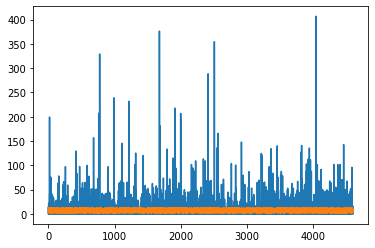

In [36]:
import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(y_pred)


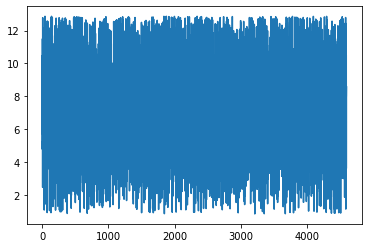

In [37]:
plt.plot(y_pred)

**With** **Normalization**

In [0]:
samples =  list(rain)
length = 365

for i in range(0,15695,length):
  sample = rain[i:i+length]
  samples.append(sample)
  data = array(samples)
  print(data.shape)

In [0]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

train_sc = sc.fit_transform(x_train)
test_sc = sc.transform(x_test)

In [0]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

train_sc = sc.fit_transform(rain)
test_sc = sc.transform(test)

In [0]:
#split into training and testing
train = x.iloc[0:12599]
test = x.iloc[12600:]

AttributeError: ignored

In [0]:
x_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [0]:
X_traint = X_train.values
X_testt = X_test.values

y_traint = y_train.values
y_testt = y_test.values

In [0]:
X_train1 = X_train.reshape(X_train.shape[0], 1, 12)
X_test1 = X_test.reshape(X_test.shape[0], 1, 12)